## Simple Displays

Representing data graphically to learn how data behaves and seeing potential structure or flaws. Plots are good to use when formulating a hypothesis, but should not be used to test a hypothesis.

In [40]:
import yfinance as yf
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from matplotlib import style
from math import pi
yf.pdr_override()

In [41]:
tickers = ['MSFT', 'NFLX']

data = pdr.get_data_yahoo(tickers, fields='Adj Close', start="2020-01-01", end="2020-06-01", interval = "1d")['Adj Close']
data.head()

[*********************100%***********************]  2 of 2 completed


,MSFT,NFLX
Date,,
2020-01-02,159.737595,329.809998
2020-01-03,157.748581,325.899994
2020-01-06,158.156342,335.829987
2020-01-07,156.714310,330.750000
2020-01-08,159.210495,339.260010


In [42]:
data['NFLX'].head()

Date
2020-01-02    329.809998
2020-01-03    325.899994
2020-01-06    335.829987
2020-01-07    330.750000
2020-01-08    339.260010
Name: NFLX, dtype: float64

### Histogram

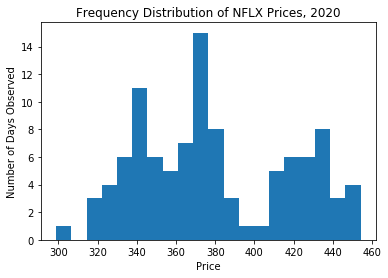

In [43]:
# Plot a histogram using 20 bins
plt.hist(data['NFLX'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of NFLX Prices, 2020');

### Returns Histogram

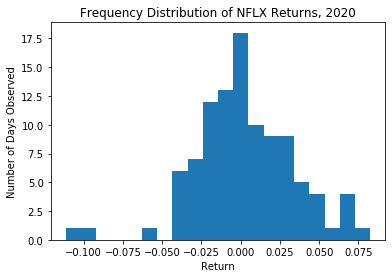

In [44]:
# Removefirst element because percent change from nothing to something is NaN
R = data['NFLX'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of NFLX Returns, 2020');

### Cumulative Histogram (Discrete Estimated CDF)

Alternative way to display the data using a cumulative distribution function, in which the height of a bar represents the number of observations that lie in that bin or in one of the previous ones. This graph is always nondecreasing, you cannot have a negative number of observations. The choice of graph depends on the information you're interested in.

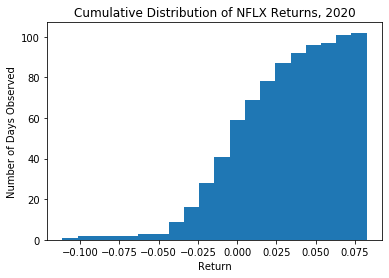

In [45]:
# Remove the first element because percent change from nothing to something is NaN
R = data['NFLX'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of NFLX Returns, 2020');

### Scatter Plot

Useful for visualizing relationship between two datasets. We use two datasets which have some sort of correspondence, such as the date on which the measurement was taken. Each point represents two corresponding values from the two data sets. However, we don't plot the date that the measurements were taken on.

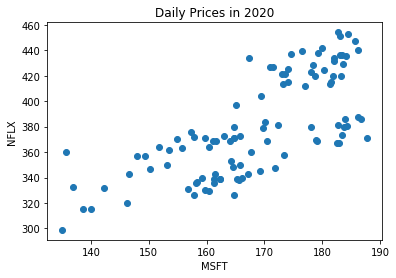

In [46]:
plt.scatter(data['MSFT'], data['NFLX'])
plt.xlabel('MSFT')
plt.ylabel('NFLX')
plt.title('Daily Prices in 2020');

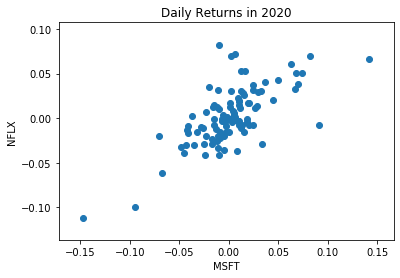

In [47]:
R_msft = data['MSFT'].pct_change()[1:]
R_nflx = data['NFLX'].pct_change()[1:]

plt.scatter(R_msft, R_nflx)
plt.xlabel('MSFT')
plt.ylabel('NFLX')
plt.title('Daily Returns in 2020');

### Line Graph

When plotting the price of a stock, showing it as a line graph makes it easier to follow the price over time. "Connecting the dots" between data points masks out changes that happened between the time we took measurements.

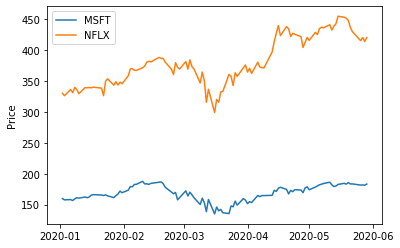

In [48]:
plt.plot(data['MSFT'])
plt.plot(data['NFLX'])
plt.ylabel('Price')
plt.legend(['MSFT', 'NFLX']);

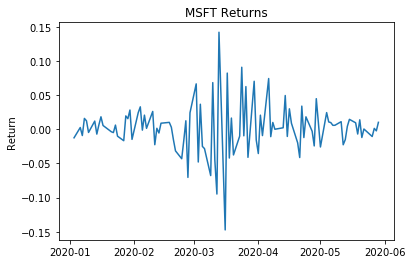

In [49]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

### Closing

Do not assume you can test a hypothesis by viewing a graph. Also do not assume that because a distribution or trend used to be true, it is still true. In general much more sophisticated and careful validation is required to test whether models hold. Plots are mainly useful when initially deciding how your models should work.